In [104]:
# Modul Dasar
import numpy as np               # Operasi matematika dan array
import pandas as pd              # Struktur data tabular (DataFrame)
import matplotlib.pyplot as plt  # Visualisasi data
import seaborn as sns            # Visualisasi data tambahan



In [105]:
data = pd.read_csv("../data/external/14tahun.csv",sep=",", thousands=".", decimal=",")


In [106]:
data.rename(columns={
    "Tanggal": "Date",
    "Terakhir": "Close",
    "Pembukaan": "Open",
    "Tertinggi": "High",
    "Terendah": "Low",
    "Vol.": "Volume",
    "Perubahan%": "Change%"
}, inplace=True)

In [107]:
data = data.iloc[::-1].reset_index(drop=True)

In [108]:
data

,Date,Close,Open,High,Low,Volume,Change%
0,04/01/2010,2575.41,2533.95,2576.06,2532.90,"1,83B","1,62%"
1,05/01/2010,2605.28,2575.62,2606.07,2575.62,"5,70B","1,16%"
2,06/01/2010,2603.30,2605.48,2622.12,2587.71,"5,16B","-0,08%"
3,07/01/2010,2586.89,2603.50,2611.60,2570.27,"4,55B","-0,63%"
4,08/01/2010,2614.37,2586.79,2614.54,2583.85,"7,37B","1,06%"
...,...,...,...,...,...,...,...
3599,26/09/2024,7744.52,7723.10,7763.08,7673.05,"20,28B","0,05%"
3600,27/09/2024,7696.92,7713.80,7736.92,7663.48,"19,05B","-0,61%"
3601,30/09/2024,7527.93,7674.29,7679.24,7527.93,"22,22B","-2,20%"
3602,01/10/2024,7642.13,7551.46,7642.13,7547.11,"20,70B","1,52%"


Read Data -> Cleaning -> EDA -> Modeling -> Eval

In [109]:
lengh_data = len(data)
split_ratio = 0.8
lengh_train = round(lengh_data * split_ratio)
lengh_validation = lengh_data -lengh_train

In [110]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [111]:
data.set_index("Date", inplace=True)

In [112]:
from utils import time_series_to_supervised

In [113]:
data = data.drop(["Change%","Volume"],axis=1)

In [114]:
var_names = data.columns
data_supervised = time_series_to_supervised(data, n_in=10, n_out=1, var_names=var_names)

In [115]:
data_supervised.head()

,Close(t-10),Open(t-10),High(t-10),Low(t-10),Close(t-9),Open(t-9),High(t-9),Low(t-9),Close(t-8),Open(t-8),...,High(t-2),Low(t-2),Close(t-1),Open(t-1),High(t-1),Low(t-1),Close(t),Open(t),High(t),Low(t)
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-18,2575.41,2533.95,2576.06,2532.90,2605.28,2575.62,2606.07,2575.62,2603.30,2605.48,...,2661.93,2633.58,2647.09,2646.75,2655.81,2638.36,2642.55,2645.44,2648.92,2629.91
2010-01-19,2605.28,2575.62,2606.07,2575.62,2603.30,2605.48,2622.12,2587.71,2586.89,2603.50,...,2655.81,2638.36,2642.55,2645.44,2648.92,2629.91,2666.07,2642.35,2666.57,2640.18
2010-01-20,2603.30,2605.48,2622.12,2587.71,2586.89,2603.50,2611.60,2570.27,2614.37,2586.79,...,2648.92,2629.91,2666.07,2642.35,2666.57,2640.18,2667.27,2666.58,2689.78,2655.00
2010-01-21,2586.89,2603.50,2611.60,2570.27,2614.37,2586.79,2614.54,2583.85,2632.20,2615.61,...,2666.57,2640.18,2667.27,2666.58,2689.78,2655.00,2638.38,2664.66,2664.66,2621.36
2010-01-22,2614.37,2586.79,2614.54,2583.85,2632.20,2615.61,2649.20,2615.61,2659.55,2632.31,...,2689.78,2655.00,2638.38,2664.66,2664.66,2621.36,2610.34,2636.96,2636.96,2580.17


In [116]:
train_data = data_supervised[:lengh_train]
validation_data = data_supervised[lengh_train:]
y_train = train_data["Close(t)"]
y_val = validation_data["Close(t)"]

In [117]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data train
scaled_train_data = scaler.fit_transform(train_data)

# Konversi data yang telah dinormalisasi kembali ke dalam DataFrame
scaled_train_data = pd.DataFrame(scaled_train_data, columns=train_data.columns)

In [118]:
scaled_validation_data = scaler.transform(validation_data)

# Konversi data yang telah dinormalisasi kembali ke dalam DataFrame
scaled_validation_data = pd.DataFrame(scaled_validation_data, columns=validation_data.columns)

In [119]:
X_train_scaled = scaled_train_data.drop(["Open(t)", "Close(t)", "High(t)", "Low(t)"], axis=1)
X_validation_scaled = scaled_validation_data.drop(["Open(t)", "Close(t)", "High(t)", "Low(t)"], axis=1)

In [120]:
# Misalnya, Anda memiliki 3 langkah waktu dan 5 fitur
timesteps = 10
features = 4
X_train = []
for i in range(timesteps):
    X_train.append(X_train_scaled.iloc[:, i*features:(i+1)*features].values)

# Ubah list menjadi array numpy
X_train = np.array(X_train)
X_train = X_train.transpose(1, 0, 2)
# Bentuknya menjadi (jumlah_sampel, timestep, feature)
print(X_train.shape)

(2883, 10, 4)


In [125]:
# Misalnya, Anda memiliki 3 langkah waktu dan 5 fitur
timesteps = 10
features = 4
X_val = []
for i in range(timesteps):
    X_val.append(X_validation_scaled.iloc[:, i*features:(i+1)*features].values)

# Ubah list menjadi array numpy
X_val = np.array(X_val)
X_val = X_val.transpose(1, 0, 2)
# Bentuknya menjadi (jumlah_sampel, timestep, feature)
print(X_val.shape)

(711, 10, 4)


In [121]:
from keras.layers import LSTM
from keras.layers import Bidirectional


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping


model_lstm = Sequential()
model_lstm.add(Bidirectional(LSTM(128, activation='relu',return_sequences=True, input_shape=(X_train.shape[1], 4))))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(128,activation='relu', return_sequences=False))
model_lstm.add(Dense(128))
model_lstm.add(Dense(1))

In [122]:
early_stopping = EarlyStopping(monitor='loss', patience=20, verbose=1, restore_best_weights=True)

model_lstm.compile(optimizer='adam', loss="mse",metrics=["mse"])



In [123]:
hist = model_lstm.fit(X_train, y_train, 
                      epochs=200, 
                      batch_size=32,
                      callbacks=[early_stopping])

Epoch 1/200
91/91 [==============================] - 9s 26ms/step - loss: 7046004.5000 - mse: 7046004.5000
Epoch 2/200
91/91 [==============================] - 2s 27ms/step - loss: 26028.6484 - mse: 26028.6484
Epoch 3/200
91/91 [==============================] - 2s 27ms/step - loss: 21957.2949 - mse: 21957.2949
Epoch 4/200
91/91 [==============================] - 2s 26ms/step - loss: 24911.1426 - mse: 24911.1426
Epoch 5/200
91/91 [==============================] - 3s 29ms/step - loss: 23011.4648 - mse: 23011.4648
Epoch 6/200
91/91 [==============================] - 2s 27ms/step - loss: 26091.0586 - mse: 26091.0586
Epoch 7/200
91/91 [==============================] - 3s 28ms/step - loss: 23080.6016 - mse: 23080.6016
Epoch 8/200
91/91 [==============================] - 2s 27ms/step - loss: 20997.2246 - mse: 20997.2246
Epoch 9/200
91/91 [==============================] - 3s 28ms/step - loss: 19490.7383 - mse: 19490.7383
Epoch 10/200
91/91 [==============================] - 3s 28ms/step - 

In [126]:
y_pred = model_lstm.predict(X_train)
y_pred_val = model_lstm.predict(X_val)

23/23 [==============================] - 0s 7ms/step


In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Menghitung MSE, RMSE, MAE, dan MAPE untuk data train
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred)
mape_train = mean_absolute_percentage_error(y_train, y_pred)

# Menghitung MSE, RMSE, MAE, dan MAPE untuk data validation
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
mape_val = mean_absolute_percentage_error(y_val, y_pred_val)


In [128]:
metrics_data = {
    "Metric": ["MSE", "RMSE", "MAE", "MAPE"],
    "Train": [mse_train, rmse_train, mae_train, mape_train],
    "Validation": [mse_val, rmse_val, mae_val, mape_val]
}

# Mengonversi dictionary menjadi DataFrame untuk tampilan tabel
metrics_df = pd.DataFrame(metrics_data)

In [129]:
metrics_df

,Metric,Train,Validation
0,MSE,9446.098981,4859.429599
1,RMSE,97.191044,69.709609
2,MAE,82.817915,54.296360
3,MAPE,0.017199,0.007855


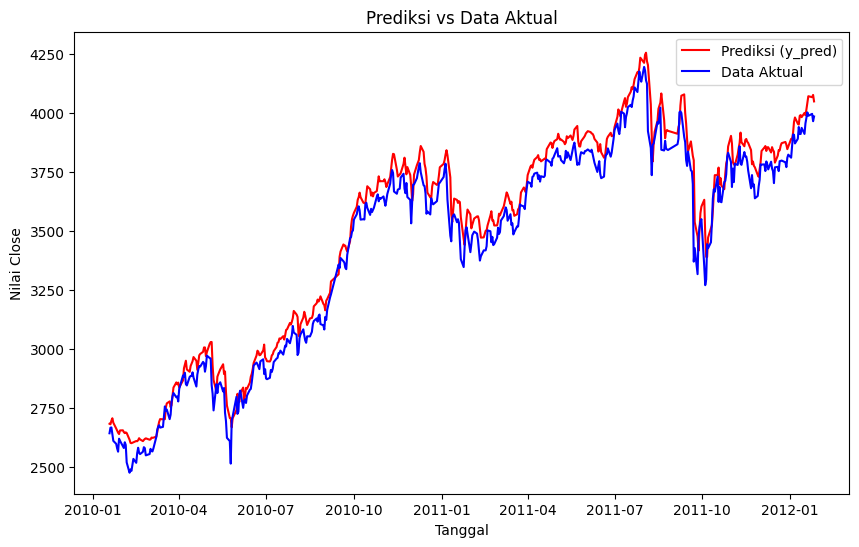

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index[:500], y_pred.squeeze()[:500], label='Prediksi (y_pred)', color='red')
plt.plot(train_data.index[:500], y_train[:500], label='Data Aktual', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Close')
plt.title('Prediksi vs Data Aktual')
plt.legend()
plt.show()

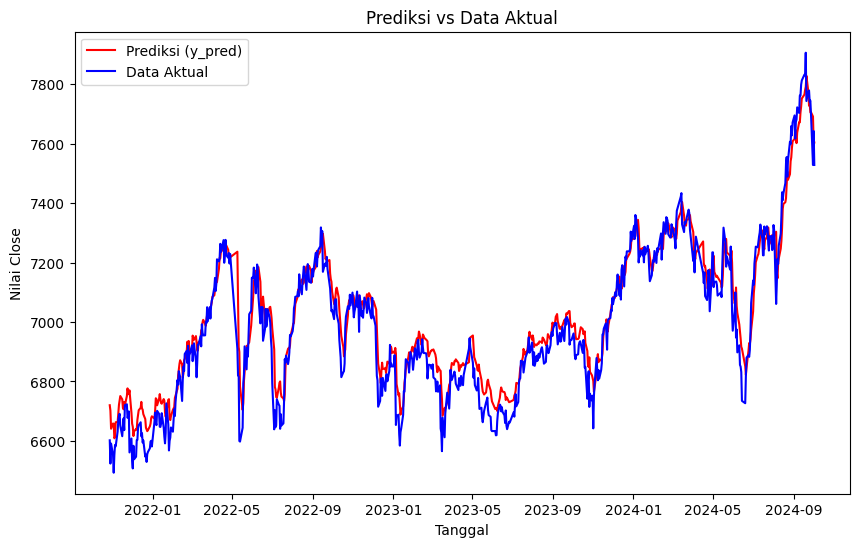

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(validation_data.index, y_pred_val.squeeze(), label='Prediksi (y_pred)', color='red')
plt.plot(validation_data.index, y_val, label='Data Aktual', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Close')
plt.title('Prediksi vs Data Aktual')
plt.legend()
plt.show()